<a href="https://colab.research.google.com/github/dinggga/super-broccoli/blob/main/220321hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념정리]**
4장: 선형 회귀(직접 공식/경사 하강법GD-배치/미니배치/확률적), 다항 회귀(학습 곡선, 과대적합), 로지스틱 회귀, 소프트맥스 회귀



# **4.1 선형 회귀**

### **4.1.1 정규방정식** 
(해석적 방법)

코드: from sklearn.linear_model import LinearRegression

(scipy.linalg.lstsq() 함수 기반으로 함: 파라미터, 잔차, rank, s 반환. np.linalg.pinv() 함수로 유사역행렬 구할 수 있음.)
- 유사역행렬: 표준행렬분해기법인 특잇값 분해(SVD) 사용: numpy.linalg.svd(). 항상 구할 수 있음.

### **4.1.2 계산 복잡도**
-정규방정식 계산 복잡도: n의 2.4제곱~3제곱 사이
-사이킷런 LinearRegression 클래스의 SVD 방법: n의 2제곱
-샘플수, 특성수와 계산 복잡도 비례

# **4.2 경사 하강법(GD)**
: 특성, 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때

방법: 무작위 초기화(파라미터 임의의 값으로 시작) > 비용함수 감소되는 방향 > 알고리즘이 최솟값에 수렴

스텝의 크기 중요 -> 학습률 하이퍼파라미터

문제점: 무작위 초기화로 인한 최솟값 발견 오류 (전역 최솟값, 지역 최솟값)

(선형 회귀 MSE 비용 함수는 볼록 함수라 괜찮음)

주의점: 모든 특성의 스케일이 같아야 함 (ex_ 사이킷런의 StandardScaler)

### **4.2.1 배치 경사 하강법**
편도함수 (파라미터에 대해 비용함수의 그래디언트 계산해야)
- 비용함수의 그레이디언트 벡터 공식 p.169

배치경사하강법: 매 스텝에서 훈련데이터 전체 사용

경사하강법의 스텝 결정 위해 학습률 사용됨 -> 적절한 학습률: 그리드 탐색 (반복횟수 제한)
- 반복 횟수 크게 지정해놓고, 그레이디언트 벡터 작아지면 알고리즘 중지

문제점: 매 스텝에서 전체 훈련 세트 사용 -> 느려짐

### **4.2.2 확률적 경사 하강법**
: 매 스텝에서 샘플 한개 무작위 선택, 그레이디언트 계산 -> 속도 빠르고 큰 훈련 세트도 가능

단점: 무작위라 배치보다 훨씬 불안정 -> 학습률을 점진적으로 감소시키자.
- 학습 스케줄: 매 반복에서 학습률 결정하는 함수

코드: from sklearn.linear_model import SGDRegressor / 파라미터: max_iter, tol, penalty, eta0 등

### **4.2.3 미니배치 경사 하강법**
: 임의의 작은 샘플 세트(미니배치)에 대해 그레이디언트 계산. 행렬 연산에 최적화된 하드웨어(특히 GPU)를 사용하여 성능 향상. SGD보다 덜 불규칙하지만 지역 최솟값에서 빠져나오긴 더 힘들 수도. 적절한 학습 스케줄 중요.



# **4.3 다항 회귀**

: 각 특성의 거듭제곱을 새로운 특성으로 추가한 확장된 데이터셋에 선형 모델 훈련

# **4.4 학습 곡선**
모델이 데이터에 잘 맞는지 보는 방법
- 훈련 데이터에서 성능 좋지만 교차검증점수 나쁨 -> 모델이 과대적합됨 / 양쪽 다 좋지 않음 -> 과소적합됨.
- 학습 곡선: 훈련 세트에서 크기 다른 서브 세트 만들어 모델을 여러 번 훈련

과소적합된 경우: 더 복잡한 모델 사용 or 더 나은 특성 선택
과대적합된 경우(훈련/검증 데이터 곡선 사이에 공간이 있을 때): 더 많은 훈련 데이터 추가

편향/분산 트레이드오프: 모델의 일반화 오차 = 편향+분산+줄일 수 없는 오차
- 편향과 분산 트레이드오프


# **4.5 규제가 있는 선형 모델**
: 모델의 가중치 제한하며 규제. 릿지/라쏘/엘라스틱넷
### **4.5.1 릿지 회귀**
: 규제가 추가된 선형 회귀 버전. (규제항이 훈련 동안에만 비용함수에 추가됨. 후에는 규제 없는 성능 지표로 평가)

l2 노름. 하이퍼파라미터 a 조절해 모델 규제 정도 조절. (a=0 -> 선형회귀 / a 커지면 직선에 가까워짐-분산 줄지만 편향 커짐)

수행 전 데이터 스케일 맞춰주기 (규제 있는 모델은 대부분 스케일 맞추는 거 필요함)

정규방정식, 경사 하강법 사용 가능

코드: from sklearn.linear_model import Ridge(alpha=) / SGDRegressor(penalty='l2')
### **4.5.2 라쏘 회귀**
: l1 노름. 덜 중요한 특성의 가중치는 제거(자동으로 특성 선택)

경사 하강법 적용할 때 서브그레이디언트 벡터 사용.

코드: from sklearn.linear_model import Lasso(alpha=) / SGDRegressor(penalty='l1')

### **4.5.3 엘라스틱넷**
: 릿지+라쏘 절충. 규제항은 릿지 라쏘 규제항 단순히 더해서 사용, 혼합정도는 혼합 비율 r로 조정. (r=0->릿지 / r=1->라쏘)

모델 적용 기준
- 규제 없는 선형 회귀는 피해야 함
- 쓰이는 특성이 몇개 뿐이면 릿지보다는 라쏘/엘라스틱넷 (불필요한 특성 가중치를 0으로 만들기에)
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 경우 엘라스틱넷 선호

코드: from sklearn.linear_model import ElasticNet(alpha=, l1_ratio=)

### **4.5.4 조기 종료**
: 검증 에러가 최솟값에 도달하면 바로 훈련 중지.

- 확률적/미니배치 경사 하강법에서는 모델이 더 나아지지 않는다고 확신 들 때 학습 멈추고 검증 에러 최소인 모델 파라미터로 돌아감.

# **4.6 로지스틱 회귀**
### **4.6.1 확률 추정**
: 입력 특성의 가중치 합 계산, 편향 더함. 바로 결과 출력 않고 결괏값의 로지스틱 출력 (시그모이드 함수, 0과 1 사이값). 로지스틱 값에 따라 클래스 예측.

### **4.6.2 훈련과 비용 함수**
훈련: 양성/음성 샘플의 확률을 추정하는 모델의 파라미터 벡터를 찾아야 함.

전체 비용함수: 훈련 샘플의 비용 평균. 경사하강법이 전역 최솟값 찾는 것 보장.모든 편도함수 포함한 그레이디언트 벡터 만들면 배치 경사 하강법 알고리즘 사용 가능. 

### **4.6.3 결정 경계**
코드: from sklearn.linear_model import LogisticRegression

로지스틱 회귀모델도 l1, l2 페널티 사용해 규제 가능. 사이킷런은 l2 페널티 기본.


### **4.6.4 소프트맥스 회귀**
: 여러 개의 이진분류기가 직접 다중 클래스를 지원하도록 일반화.

크로스 엔트로피 비용 함수를 최소화

코드: LogisticRegression(multi_class='multinomial', solver='lbfgs', C=)


-------------
-----------
# **[필사]**

4.1 선형 회귀

4.1.1 정규방정식

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.74205927],
       [3.31730188]])

In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.74205927],
       [10.37666302]])

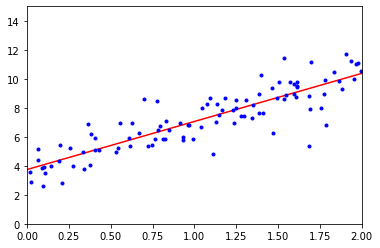

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.74205927] [[3.31730188]]
[[ 3.74205927]
 [10.37666302]]


In [5]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.74205927],
       [3.31730188]])

In [6]:
np.linalg.pinv(X_b).dot(y)

array([[3.74205927],
       [3.31730188]])

4.2 경사하강법

4.2.1 배치경사하강법

In [7]:
eta = 0.1
n_interactions = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_interactions):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[3.74205927],
       [3.31730188]])

4.2.2 확률적경사하강법

In [8]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

theta

array([[3.68817762],
       [3.2691977 ]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.63093478]), array([3.23333298]))

4.3 다항 회귀

In [10]:
# 2차방정식으로 비선형 데이터 생성 (잡음 포함)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [11]:
# PolynomialFeatures로 훈련 데이터 변환 (2차 다항)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[1.16280211] [1.16280211 1.35210874]


In [12]:
# Linear Regression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.13323787]), array([[0.9250745 , 0.47451812]]))

4.4 학습 곡선

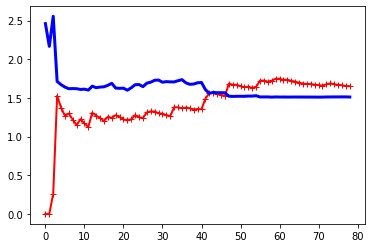

In [13]:
# 과소적합 모델

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

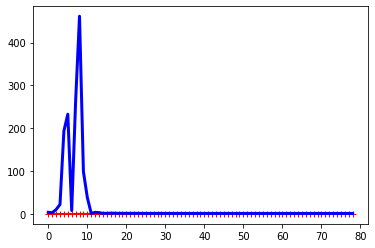

In [14]:
# 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

4.5 규제가 있는 선형 모델

4.5.1 릿지 회귀

In [15]:
# 정규 방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.08735043]])

In [16]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.08536983])

4.5.2 라쏘 회귀

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.04661122])

4.5.3 엘라스틱넷

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.04872464])

4.5.4 조기 종료

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

4.6 로지스틱 회귀

4.6.3 결정 경계


In [24]:
# Iris-Versicolor 종 감지하는 분류기 만들기

# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


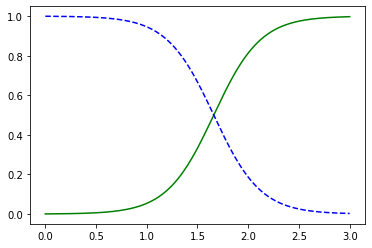

In [25]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

# 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')

In [26]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

4.6.4 소프트맥스 회귀

In [28]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

softmax_reg.predict([[5,2]])

array([2])

In [29]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])